In [ ]:
import random
from time import process_time_ns
# How to represent a binary tree?

# datatype def'n:
#  A BSTree is either:
#    - (False, False,  False,  0)                        (interpretation: empty tree)
#    - ( [number], [BSTree], [BSTree], heightOfTree )    (interpretation: number at root, and left-, right- subtrees)
#       we'll call this non-empty tree a "Branch".
mt = (False, False,  False,  0)                          # convenient variable/name for the empty-tree
myData = (57, 
          (18,
           (2,mt,mt,1),
            (35, 
            (20,mt,mt,1), 
            (40,mt,mt,1),2),3),
          (78,mt,mt,1),
           4)

#myData[0] -- value at root
#myData[1] -- left  child
#myData[2] -- right child
#myData[3] -- height of tree


In [ ]:
# constructor, predicate:
def isEmpty( aBSTree): return aBSTree==mt

# wrappers, so we can act like these tuples have named-fields
def val(  aBSTree): return aBSTree[0]
def left( aBSTree): return aBSTree[1]
def right(aBSTree): return aBSTree[2]
# def heig(aBSTree): return 0 if isEmpty(aBSTree) else aBSTree[3]

def newBranch( val,l, r ): return (val,l,r,1 + max(l[3],r[3]))

t1 = newBranch(29,       
               newBranch(2,mt,mt),
               newBranch(35,     
                         newBranch(30,mt,mt),
                         newBranch(44,mt,mt)))  
# print(t1)            

assert val(t1) == 29
assert left(t1) == (2,mt,mt,1)
assert val(left(right(t1))) == 30 



In [ ]:
# Template, for *any* function processing a BSTree:
#
# anyTreeFunc : BSTree -> ???
#
# def anyTreeFunc( t ):
#   return answer_for_base_case  if isEmpty(t) else \
#          somehowCombine( val(t), anyTreeFunc(left(t)), anyTreeFunc(right(t)) )


def size( t ):
  """size : BSTree -> natnum
  Return the # of Branches in `t` (that is, non-Empty subtrees it contains)
  """
  return 0 if isEmpty(t) else \
         1 + size(left(t)) + size(right(t))

assert size(mt) == 0
assert size((50,mt,mt)) == 1
assert size(t1) == 5



In [ ]:
def contains_v1( t, target ):
  """contains_v1 : BTree, number -> boolean
  Does `target` contain `t`?  
  v1 is for *any* binary tree; it does *not* use the binary-search-tree property (and it searches the entire tree).
  """
  return False if isEmpty(t) \
    else target==val(t)  \
         or contains_v1(left(t),target)  \
         or contains_v1(right(t),target)

assert contains_v1(mt, 50)         == False
assert contains_v1((50,mt,mt), 50) == True
assert contains_v1((50,mt,mt), 37) == False
assert contains_v1(t1,29) == True
assert contains_v1(t1, 2) == True
assert contains_v1(t1,35) == True
assert contains_v1(t1,30) == True
assert contains_v1(t1,44) == True
assert contains_v1(t1,31) == False

In [ ]:
#######################

# The Binary **Search** Tree ("BST") Property:
#   - holds for `mt`
#   - For a non-empty tree t, holds if
#     val(left(t))  <=  val(t)  <= val(right(t))    (assuming those exist)
#     and left(t),right(t) also have the BST Property.



# contains : BSTree, number -> boolean
#
def contains( t, target ):
  """contains : BSTree, number -> boolean
  Does `target` contain `t`?  
  (Runs in time O(height(t));  `t` must be a Binary Search Tree.)
  """
  return False if isEmpty(t) else \
         val(t)==target \
         or (val(t) < target and contains(right(t), target))  \
         or (val(t) > target and contains(left(t),  target))

assert contains(mt, 50)         == False
assert contains((50,mt,mt), 50) == True
assert contains((50,mt,mt), 37) == False
assert contains(t1,29) == True
assert contains(t1, 2) == True
assert contains(t1,35) == True
assert contains(t1,30) == True
assert contains(t1,44) == True
assert contains(t1,31) == False



In [ ]:


def smallest(t):
    """ smallest : BSTree -> num-or-None
    Return the smallest item in `t` (or None, if `t` is empty).
    """
    return None if isEmpty(t) else \
           smallest(left(t)) or val(t)  # abuse how `None or 3` evals to `3`
    

# Or, here's a different, sneaky technique:
# Walk down the right-hand-branch, keeping track of the previously-seen item.

def biggest(t):
    """ biggest : BSTree -> num-or-None
    Return the biggest item in `t` (or None, if `t` is empty).
    """
    return biggestOr(t,None)

def biggestOr(t,biggestSeenSoFar):
    """ biggest : BSTree, num -> num-or-None
    Return the biggest item in `t` (or `bigestSeenSoFar`, if `t` is empty).
    """
    return biggestSeenSoFar if isEmpty(t) else \
           biggestOr(right(t),val(t))


assert biggest( (7,mt,mt) ) == 7
#print( biggest( t1 ) )
assert biggest( t1 ) == 44
assert smallest( (7,mt,mt) ) == 7
assert smallest( t1 ) == 2


In [ ]:
def insert_v1( t, n ):
  """insert : BSTree, num -> BSTree
  Return a new BSTree like `t` except with `n` inserted (at a leaf).
  The result may not be balanced.
  """
  if isEmpty(t):
    return newBranch(n,mt,mt)
  else:
    if val(t) < n:
      return newBranch(val(t),left(t),insert_v1(right(t),n))
    else:
        return newBranch(val(t),insert_v1(left(t),n),right(t))
      


assert insert_v1( mt, 77 ) == (77,mt,mt,1)
assert insert_v1( (50,mt,mt,1), 77 ) == (50,mt,(77,mt,mt,1),2)
assert insert_v1( (50,mt,mt,1), 22 ) == (50,
                                       (22,mt,mt,1),
                                       mt,2)
assert insert_v1(t1,32) == (29,       
                             (2,mt,mt,1),
                             (35,     
                              (30,
                                mt,
                                (32,mt,mt,1),2),
                              (44,mt,mt,1),3),4)   


assert t1 == (29,       
              (2,mt,mt,1),
              (35,     
               (30,mt,mt,1),
               (44,mt,mt,1),2),3)   


In [ ]:
# To delete from a BSTRee:
#   - deleting a leaf easy -- just return empty tree
#   - deleting the root: "replace" it with the smallest(right)),
#      OR biggest(left(t))

#    pre-condition: t != mt
#
def delete_v1( t, n ):
  """delete : BSTree, num -> BSTree
  Return a BSTree like `t` except with `n` deleted.
  Throws an exception if `n` doesn't occur.
  """
  if isEmpty(t):
    raise f"{n} not contained in the initial tree"
  else:
    if n < val(t):
      return newBranch(val(t), delete_v1(left(t),n), right(t))
    elif n > val(t):
      return newBranch(val(t), left(t), delete_v1(right(t),n))
    else: # n==val(t) -- delete the root
      if not(isEmpty(right(t))):
         replacement = smallest(right(t))
         return newBranch(replacement, left(t), delete_v1(right(t),replacement))
      elif not(isEmpty(left(t))):
         replacement = biggest(left(t))
         return newBranch(replacement, delete_v1(left(t),replacement), right(t))
         # Alternately, since we know isEmpty(right), we could just return left(t)
      else: # deleting root, whose children are both empty:
        return mt
        

In [ ]:
# run-time of contains, insert, and delete, in a BSTree:
#     for a tree of height h, it takes O(h) steps.
#
#  IF the tree is (relatively) balanced, then height is log(n) -- yay!
#
# BUT: how to keep tree balanced???

###############
# "AVL Trees" -- self-balancing, after inserts and deletes.
#
#
#  We call a tree t "AVL Balanced" if:
#    | height(left) - height(right) | <= 1,
#  and both left and right are themselves AVL balanced.
#
# We will show how to insert/delete into a balanced, so that they *stay* balanced.
#
# - We'll do it by using tree rotations:
#   

t23 = (60,mt,mt,1)
t4  = (99,mt,mt,1)

def rotateCCW( t ):
    """ rotateCCW : BSTree -> BSTree
    Do a counter-clockwise rotation on a BSTree,
    maintaining the binary-search-tree invariant (ordering).
    Pre-condition: t and right(t) are both non-empty BSTrees.
    """
    # see diagram https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/AVL-simple-left_K.svg/388px-AVL-simple-left_K.svg.png
    X   = val(t)
    t1  = left(t)
    Z   = val(right(t))
    t23 = left(right(t))
    t4  = right(right(t))
    return newBranch(Z, newBranch(X,t1,t23),t4)

assert rotateCCW(  (50,mt,(75,mt,mt,1),2) )  == (75,(50,mt,mt,1),mt,2)
assert rotateCCW(  (50,t1,(75,t23,t4,2),4) ) == (75, (50,t1,t23,4), t4,5)


In [ ]:
def rotateCW( t ):
    """ rotateCW : BSTree -> BSTree
    Do a clockwise rotation on a BSTree,
    maintaining the binary-search-tree invariant (ordering).
    Pre-condition: t and left(t) are both non-empty BSTrees.
    """
    # see diagram https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/AVL-simple-left_K.svg/388px-AVL-simple-left_K.svg.png
    X   = val(t)
    t1  = right(t)
    Z   = val(left(t))
    t23 = right(left(t))
    t4  = left(left(t))
    return newBranch(Z,t4,newBranch(X,t23,t1))

assert rotateCW(  (50,(75,mt,mt,1),mt,2) )  == (75,mt,(50,mt,mt,1),2)
assert rotateCW(  (50,(75,t23,t4,2),t1,4) ) == (75,t23,(50,t4,t1,4),5)


In [ ]:
# AVL observation:
# when you do an insert or delete, the 
# balance gets messed up by at most 1, so the unbalance is at most 2.
# - if the left side is shorter than the outside-right (by two),
#   then a single rotateCCW fixes.
# - if the left side is shorter than the inside-right (by two),
#   then first rotateCW the right-child, then do a rotateCCW at root.
# - other two mirror-images similarly.
#
def balance(t):
   """balance: BSTree -> BStree
   precondition:  abs(height(left(t)) - height(right(t))) <= 2
                  and there is only one *leaf* causing this excess.
   postcondition: for the returned tree `r`,
                  abs(height(left(r)) - height(right(r))) <= 1
                  and it still has binary-search-tree property.
   """
   if t==mt: return t
   elif abs(left(t)[3] - right(t)[3]) <= 1 : return t
   else:
       hl = left(t)[3]
       hr = right(t)[3]
       if (hl == hr - 2): # left side short
          if hl == right(right(t))[3] - 1: 
             # the unbalance is on outside
             return rotateCCW(t)
          else:
             # the unbalance is on inside; 2 rotations needed:
             return rotateCCW((val(t),left(t),rotateCW(right(t))) )
       else:             # right side short
          # TODO: add mirror-image of above if-else
          if (hr == hl - 2): # right side short
            if hr == left(left(t))[3] - 1: 
             # the unbalance is on outside
             return rotateCW(t)
            else:
             # the unbalance is on inside; 2 rotations needed:
             return rotateCW( (val(t),rotateCCW(left(t)),right(t)) )

t= (50,(30,mt,mt),(75,(60,(55,mt,mt),(73,mt,mt)),(80,mt,mt)))
#right of tree unbalanced on inside
assert balance((50,
                (30,mt,mt,1),
                (75,
                    (60,
                     (55,mt,mt,1),
                     (73,mt,mt,1),2),
                    (80,mt,mt,1),3),4) ) == (60, 
                                            (50, 
                                                (30, mt, mt,1), 
                                                (55, mt, mt,1),2), 
                                            (75, 
                                                (73, mt, mt,1), 
                                                (80, mt, mt,1),2),3)

#left of tree unbalanced on inside
assert balance((50,
               (30,
                    (20,mt,mt,1),
                    (40,
                        (35,mt,mt,1),
                        (45,mt,mt,1),2),3),
                (75,mt,mt,1),4) ) == (40, 
                                     (30, 
                                        (20, mt, mt,1), 
                                        (35, mt, mt,1),2),
                                     (50, 
                                        (45, mt, mt,1), 
                                        (75, mt, mt,1),2),3)


 

In [ ]:
def insert_v2( t, n ):
  """Balanced insert : BSTree, num -> BSTree
  Return a new BSTree like `t` except with `n` inserted (at a leaf).
  The result is balanced.
  """
  if isEmpty(t):
    return newBranch(n,mt,mt)
  else:
    if val(t) < n:
      return balance(newBranch(val(t),left(t),insert_v2(right(t),n)))
    else:
      return balance(newBranch(val(t),insert_v2(left(t),n),right(t)))

assert insert_v2( mt, 77 ) == (77,mt,mt,1)

assert insert_v2( (50,
                  (40,mt,mt,1),
                  mt,2), 77 ) == (50,
                                 (40,mt,mt,1),
                                 (77,mt,mt,1),2)
assert insert_v2( (50,mt,mt,1), 22 ) == (50,
                                       (22,mt,mt,1),
                                       mt,2)
assert insert_v2( (50,(20,mt,mt,1),mt,2), 22 ) == (22,
                                       (20,mt,mt,1),
                                       (50,mt,mt,1),2)                                     


In [ ]:
def delete_v2( t, n ):
  """Balanced delete : BSTree, num -> BSTree
  Return a BSTree like `t` except with `n` deleted.
  Throws an exception if `n` doesn't occur.
  """
  if isEmpty(t):
    raise f"{n} not contained in the initial tree"
  else:
    if n < val(t):
      return balance(newBranch(val(t), delete_v2(left(t),n), right(t)))
    elif n > val(t):
      return balance(newBranch(val(t), left(t), delete_v2(right(t),n)))
    else: # n==val(t) -- delete the root
      if not(isEmpty(right(t))):
         replacement = smallest(right(t))
         return balance((replacement, left(t), delete_v2(right(t),replacement)))
      elif not(isEmpty(left(t))):
         replacement = biggest(left(t))
         return balance(newBranch(replacement, delete_v2(left(t),replacement), right(t)))
         # Alternately, since we know isEmpty(right), we could just return left(t)
      else: # deleting root, whose children are both empty:
        return mt

assert delete_v2( (50,mt,mt,1),50 ) ==  mt
assert delete_v2( (50,(20,mt,mt,1),mt,2), 20 ) == (50,mt,mt,1)     
assert delete_v2((50,
                 (30,mt,mt,1),
                 (75,
                    (60,
                        (55,mt,mt,1),
                        (73,mt,mt,1),2),
                    (80,mt,mt, 1),3),4) , 55 ) == (60, 
                                                  (50, 
                                                    (30, mt, mt,1), 
                                                    mt,2), 
                                                  (75, 
                                                    (73, mt, mt,1), 
                                                    (80, mt, mt,1),2),3)



In [ ]:
import math  

# # num_inserts=[1000,2000,4000,8000,16000,32000,64000]  
# num_inserts=[2,4,8,16,32,64,128,256]  
# def measure_BStreePerformance(num_inserts):
#     BStree = mt
#     insert_time =[]
#     for j in num_inserts:
#         random_list = []
#         # generating random numbers using random.randint
#         for i in range(j):
#             random_list.append(random.randint(0,1000))
#         print("Length of random list",len(random_list))
#         t1_start = process_time_ns()
#         for k in random_list:
#            BStree = insert_v2( BStree,k)
#         t1_stop = process_time_ns()
#         BStree = mt
#             # print(' Time taken for',i,' inserts :',t1_stop-t1_start,'\n')
#         insert_time.append(t1_stop-t1_start)
#     return insert_time

# insertTimeList = measure_BStreePerformance(num_inserts)
# print(insertTimeList)

num_inserts=[2,4,8,16,32,64,128,256]  
def measure_BStreePerformance(num_inserts):
    BStree = mt
    insert_time =[]
    for j in num_inserts:
        random_list = []
        # generating random numbers using random.randint
        for i in range(j):
            random_list.append(random.randint(0,10000000))
        print("Length of random list",len(random_list))
        t1_start = process_time_ns()
        for k in random_list:
            BStree = insert_v2( BStree,k)
        t1_stop = process_time_ns()
        # print(BStree)
        BStree = mt
        # print(' Time taken for',i,' inserts :',t1_stop-t1_start,'\n')
        insert_time.append(t1_stop-t1_start)
    return insert_time
insertTimeList = measure_BStreePerformance(num_inserts)
print(insertTimeList)
# TODO: update our 3-tuple to keep one more field: the (cached) height,
#    to avoid O(n) time for each call to `height`.


Length of random list 2
Length of random list 4
Length of random list 8
Length of random list 16
Length of random list 32
Length of random list 64
Length of random list 128
Length of random list 256
[26530, 31600, 56880, 225380, 329881, 735221, 934142, 2015092]


Text(0.5, 1.0, 'Performance Measure of HeightCachedBSTree')

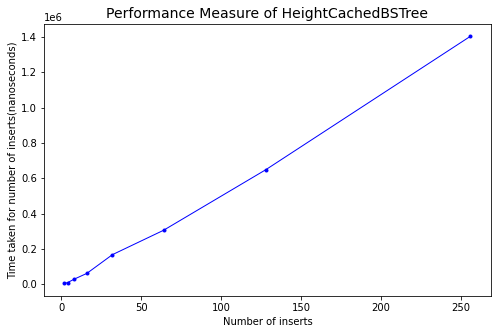

In [ ]:
num_inserts=[2,4,8,16,32,64,128,256] 
insertTimeList=[4000, 9000, 28000, 61000, 167000, 305000, 648000, 1403000]
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,5)
gs = gridspec.GridSpec(2, 2)
# plt.grid(zorder=0)
plt.plot(num_inserts,insertTimeList,color='blue', marker = ".", linewidth=1, scalex=True,scaley=True, zorder=3)
plt.xlabel('Number of inserts', fontsize=10)
plt.ylabel('Time taken for number of inserts(nanoseconds)', fontsize=10)
plt.title('Performance Measure of HeightCachedBSTree', loc='Center', fontsize=14)